In [1]:
# 多输出
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

Kera 的应用模块 Application 提供了带有预训练权重的 Keras 模型，这些模型可以用来进行预测、特征提取和 finetune。模型存储路径是 `~/.keras/models/`  
英文官方文档( 建议 )：[VGG19模型](https://keras.io/applications/#vgg19)  
中文手册路径：[Keras Application应用](https://keras-cn.readthedocs.io/en/latest/other/application/#application)

---

## 1. VGG19

### 0. 导入库与预定义
将可视化的函数定义在此处

In [2]:
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input, decode_predictions
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline


# 用于可视化的函数预定义
def visualize_pred(features, top=10):
    ''' 对分类的结果可视化成条形图
    Args:
        features: list,预测的结果,如[('n02123394', 'Persian_cat', 0.24321416),]
        top: int,可视化的数量，默认画 10 组
    '''
    # 从预测结果里提取出自信度以及标签
    pred = decode_predictions(features, top=top)
    y_lis = []  # 存储各类别对应的预测自信度
    label = []  # 存储各类别对应的标签
    for result in pred[0]:
        y_lis.append(result[2])
        label.append(result[1])

    # 生成横纵坐标
    x = np.arange(len(y_lis))
    y = np.array(y_lis)  # list 转 array

    # 生成颜色
    map_vir = cm.get_cmap(name='coolwarm')  # colormap
    norm = plt.Normalize(y.min(), y.max())  # normalize y
    color = map_vir(norm(y))  # trans normalized y to RGB

    # 画条形图
    ax = plt.bar(x, y, color=color)

    # 添加图中标注与修改横坐标标注
    for x0, y0, co in zip(x, y, color):
        plt.text(x0, y0 + 0.001, '%0.3f' %
                 y0, ha='center', va='bottom', color=co)
    plt.xticks(x, label)
    plt.xticks(rotation=75)


### 1.1 加载模型

如果`~/.keras/models/`下没有权值文件 `h5`，那就会自动下载。

In [3]:
model_vgg19 = VGG19(weights='imagenet', include_top=True)

### 1.2 加载图片数据

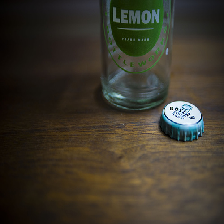

(224, 224, 3)

In [5]:
# img_path = 'E:\ssd_keras-master\examples\cat1.jpg'
img_path = './bottle.jpg'

img = image.load_img(img_path, target_size=(224, 224))
img
x = image.img_to_array(img)
# image.img_to_array  # 输入必须是 PIL.Image 类型
x.shape

x = np.expand_dims(x, axis=0)  # 增加一列，shape: (n, h, w, c)
x = preprocess_input(x)  # 归一化

### 1.3 预测

In [7]:
features = model_vgg19.predict(x)

# 从包含 Imagenet 所有标签的 json中解析获得预测的标签
decode_predictions(features)

[[('n03788365', 'mosquito_net', 0.051339515),
  ('n04209239', 'shower_curtain', 0.037259944),
  ('n15075141', 'toilet_tissue', 0.029984681),
  ('n02786058', 'Band_Aid', 0.01957061),
  ('n03920288', 'Petri_dish', 0.018976167)]]

### 1.4 预测结果可视化
可视化的例子又见[plt绘图颜色渐变以及colormap](https://www.brothereye.cn/python/427/)

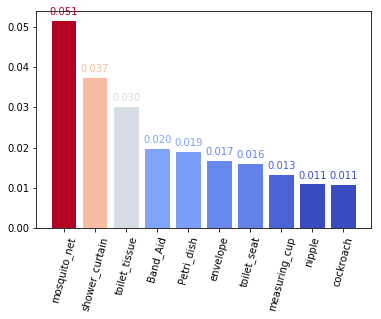

In [8]:
visualize_pred(features)

## 2. InceptionV3
过程同上。此处将代码整理到一起。

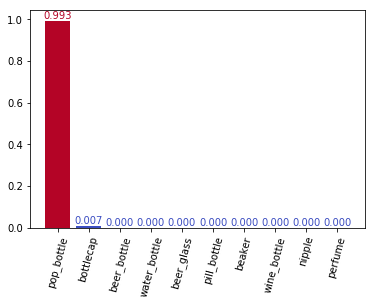

In [9]:
# load img
# img_path = 'E:\ssd_keras-master\examples\cat1.jpg'
img_path = './bottle.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)

# preprocess
x = np.expand_dims(x, axis=0)  # 增加一列，shape: (n, h, w, c)
x = preprocess_input(x)  # 归一化

# predict
base_model_icv3 = InceptionV3(weights='imagenet', include_top=True)
features = base_model_icv3.predict(x)

# visualizing
visualize_pred(features)

In [4]:
# predict
base_model_icv3 = InceptionV3(weights='imagenet', include_top=True)

In [ ]:
base_model_icv3.summary()

官方文档里有关于准确度的表格。InceptionV3 的准确略高于 VGG19

## 2. 可视化中间层的输出